In [2]:
import os
import pandas as pd

# Arbeitsverzeichnis
# MajorASUS
#root_dir = r'C:\Workspace\jupyter_lab\testresult_PiZero2_2024.10.27_03.46_-v'
# MajorPC
root_dir = r'C:\Workspace\jupyter\data\nist\testresult_PiZero2_2024.10.27_03.46_-v'

# Leere Liste für die Daten
data = []

# Gehe durch alle Unterverzeichnisse
for subdir, dirs, files in os.walk(root_dir):
    # Überprüfe, ob die Datei 'PQCkemKAT.time' existiert
    if 'PQCkemKAT.time' in files:
        file_path = os.path.join(subdir, 'PQCkemKAT.time')
        algorithm_name = os.path.basename(subdir)  # Algorithmusname aus Verzeichnisname extrahieren
        
        # Öffne die Datei mit UTF-8-Encoding
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.readlines()
        
        # Variablen für die extrahierten Daten
        count = None 
        prepare = crypto_kem_keypair = crypto_kem_enc = crypto_kem_dec = None
        
        # Gehe durch jede Zeile und extrahiere die Werte
        for line in content:
            # Extrahiere die count-Zeilen und setze die Variablen
            if line.startswith("count ="):
                # Wenn ein vorheriger count-Wert gefunden wurde, speichere die Werte
                if count is not None:
                    data.append([algorithm_name, count, prepare, crypto_kem_keypair, crypto_kem_enc, crypto_kem_dec])
                
                count = int(line.split('=')[1].strip())
            
            # Extrahiere die Zeitwerte und wandle sie in Integer (μs)
            if 'prepare (μs)' in line:
                prepare = int(line.split('=')[1].strip())
            elif 'crypto_kem_keypair (μs)' in line:
                crypto_kem_keypair = int(line.split('=')[1].strip())
            elif 'crypto_kem_enc (μs)' in line:
                crypto_kem_enc = int(line.split('=')[1].strip())
            elif 'crypto_kem_dec (μs)' in line:
                crypto_kem_dec = int(line.split('=')[1].strip())
        
        # Füge auch den letzten Satz von Daten hinzu, falls vorhanden
        if count is not None:
            data.append([algorithm_name, count, prepare, crypto_kem_keypair, crypto_kem_enc, crypto_kem_dec])

# Erstelle einen Pandas DataFrame aus den extrahierten Daten
df = pd.DataFrame(data, columns=['Algorithmus', 'count', 'prepare (μs)', 'crypto_kem_keypair (μs)', 'crypto_kem_enc (μs)', 'crypto_kem_dec (μs)'])

# Ausgabe des DataFrames
print(df)


                           Algorithmus  count  prepare (μs)  \
0                          BIG_QUAKE_1      0           255   
1                          BIG_QUAKE_1      1            85   
2                          BIG_QUAKE_1      2            89   
3                          BIG_QUAKE_1      3            87   
4                          BIG_QUAKE_1      4            90   
..                                 ...    ...           ...   
942  ThreeBears_With_Asm_PapaBearEphem      5            65   
943  ThreeBears_With_Asm_PapaBearEphem      6            65   
944  ThreeBears_With_Asm_PapaBearEphem      7            66   
945  ThreeBears_With_Asm_PapaBearEphem      8            64   
946  ThreeBears_With_Asm_PapaBearEphem      9            65   

     crypto_kem_keypair (μs)  crypto_kem_enc (μs)  crypto_kem_dec (μs)  
0                    1957511                 6906                10916  
1                    1939130                 6698                10992  
2                    194

In [5]:
# Speichere den DataFrame als CSV-Datei
df.to_csv(r'PQCkemKAT.time.df.csv', index=False)


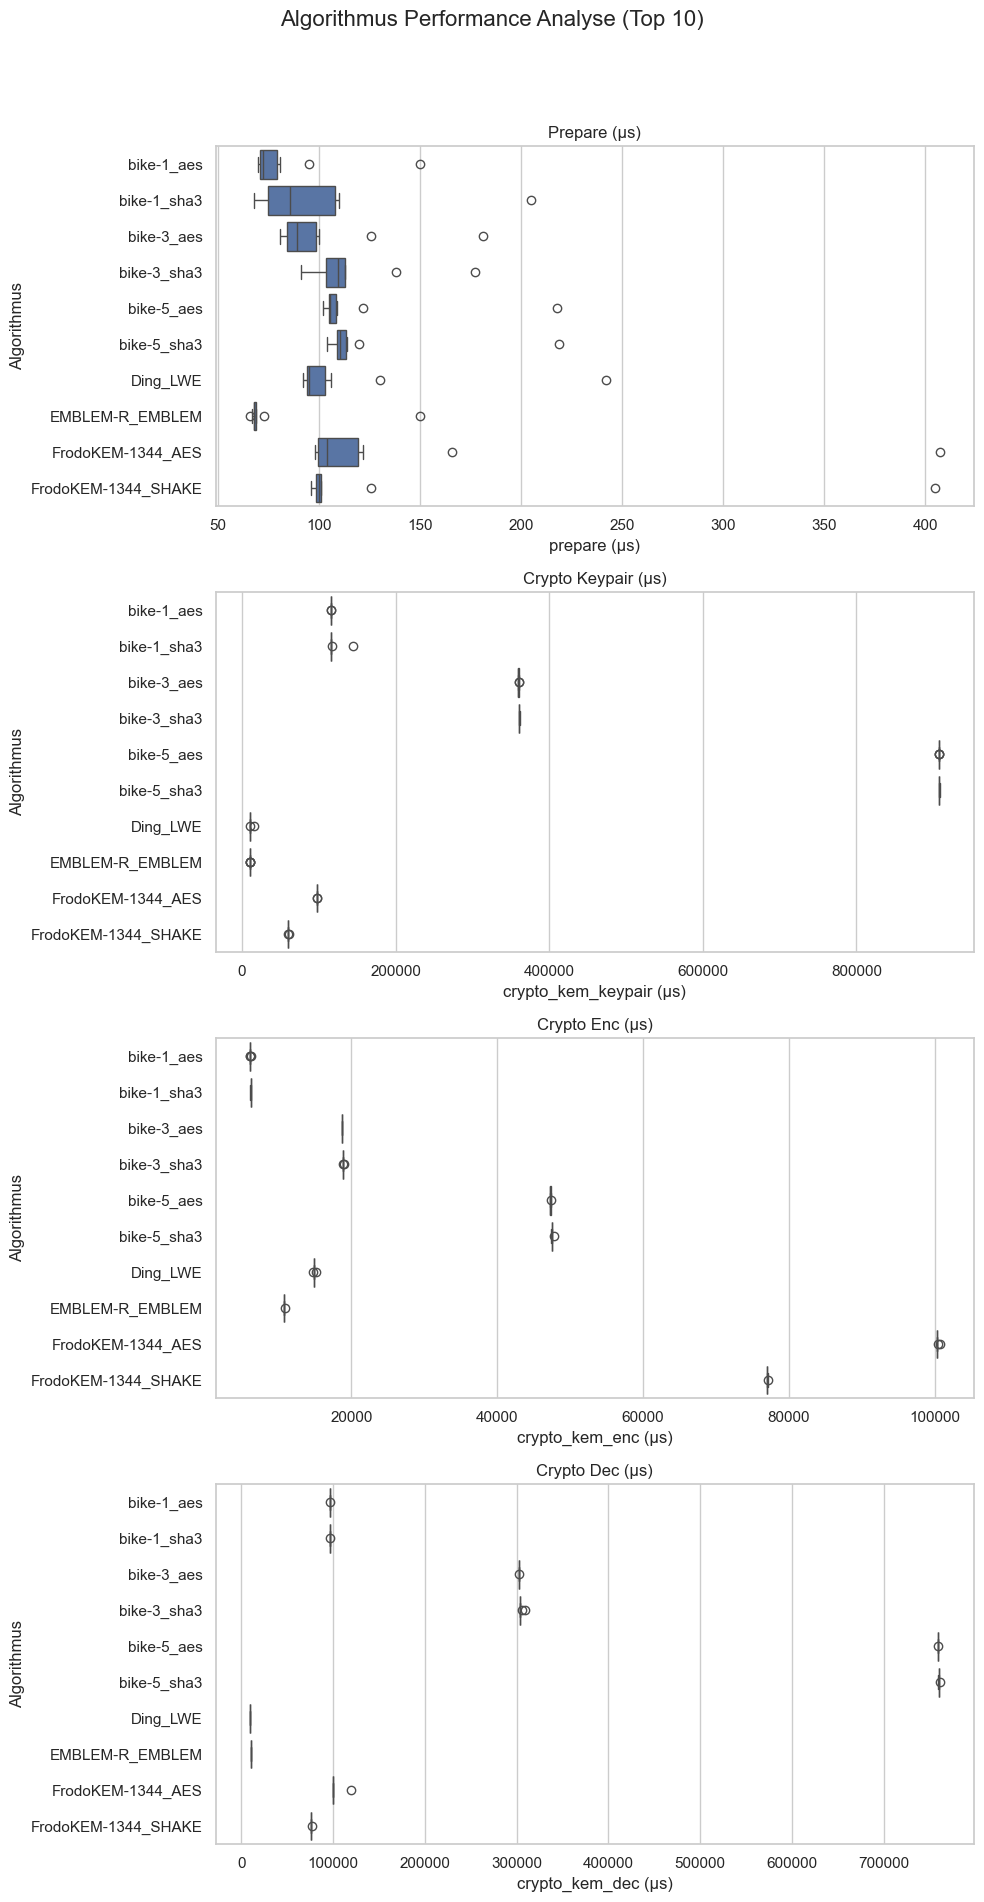

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Anzahl der Top-Algorithmen für die Darstellung
num_algorithms = 10

# Daten laden (ersetze dies mit deinem DataFrame)
# Hier wird angenommen, dass df bereits existiert
df = pd.DataFrame(data, columns=['Algorithmus', 'count', 'prepare (μs)', 'crypto_kem_keypair (μs)', 'crypto_kem_enc (μs)', 'crypto_kem_dec (μs)'])

# Setze den Stil für die Plots
sns.set(style="whitegrid")

# Wähle die Top n Algorithmen aus
top_algorithms = df['Algorithmus'].value_counts().index[:num_algorithms]
df_top = df[df['Algorithmus'].isin(top_algorithms)]

# Erstelle eine Figure mit mehreren Subplots (vertikal)
fig, axes = plt.subplots(4, 1, figsize=(10, 20))
fig.suptitle(f"Algorithmus Performance Analyse (Top {num_algorithms})", fontsize=16)

# Plot für "prepare (μs)"
sns.boxplot(data=df_top, x="prepare (μs)", y="Algorithmus", ax=axes[0])
axes[0].set_title("Prepare (μs)")

# Plot für "crypto_kem_keypair (μs)"
sns.boxplot(data=df_top, x="crypto_kem_keypair (μs)", y="Algorithmus", ax=axes[1])
axes[1].set_title("Crypto Keypair (μs)")

# Plot für "crypto_kem_enc (μs)"
sns.boxplot(data=df_top, x="crypto_kem_enc (μs)", y="Algorithmus", ax=axes[2])
axes[2].set_title("Crypto Enc (μs)")

# Plot für "crypto_kem_dec (μs)"
sns.boxplot(data=df_top, x="crypto_kem_dec (μs)", y="Algorithmus", ax=axes[3])
axes[3].set_title("Crypto Dec (μs)")

# Layout anpassen
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


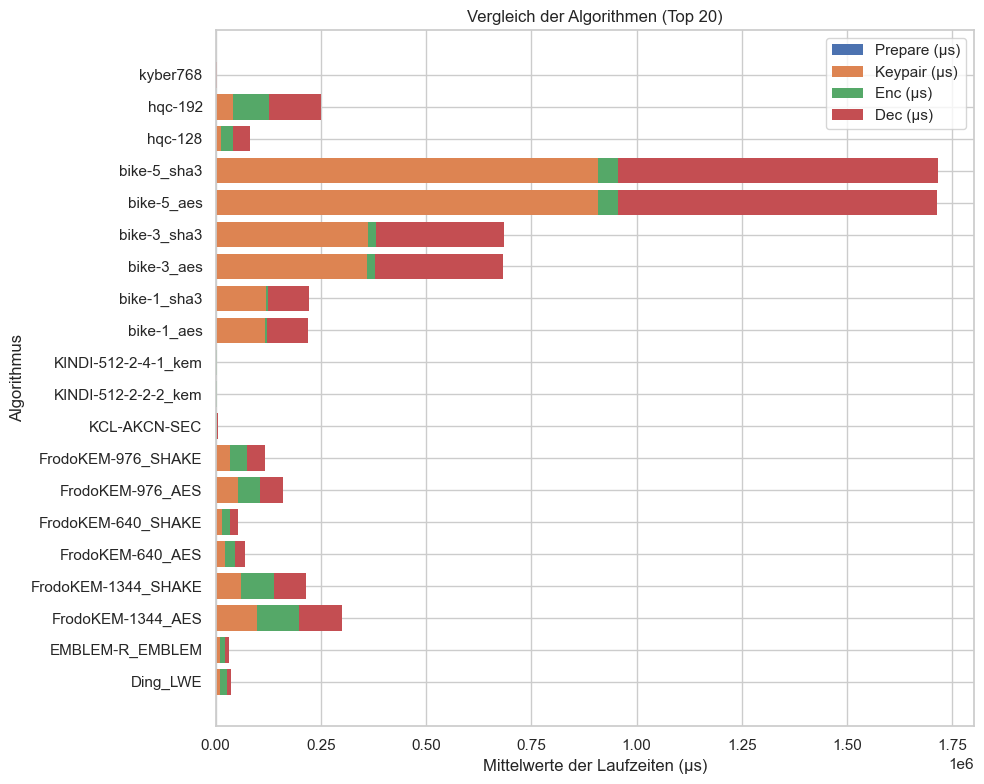

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Anzahl der Top-Algorithmen für die Darstellung
num_algorithms = 20

# Daten laden (ersetze dies mit deinem DataFrame)
# Hier wird angenommen, dass df bereits existiert
df = pd.DataFrame(data, columns=['Algorithmus', 'count', 'prepare (μs)', 'crypto_kem_keypair (μs)', 'crypto_kem_enc (μs)', 'crypto_kem_dec (μs)'])

# Setze den Stil für die Plots
sns.set(style="whitegrid")

# Wähle die Top n Algorithmen aus
top_algorithms = df['Algorithmus'].value_counts().index[:num_algorithms]
df_top = df[df['Algorithmus'].isin(top_algorithms)]

# Gruppiere die Daten nach Algorithmus und berechne den Mittelwert
df_mean = df_top.groupby('Algorithmus').mean().reset_index()

# Erstelle eine Figure für das gestapelte Balkendiagramm
fig, ax = plt.subplots(figsize=(10, 8))

# Positionen für die Balken
y = np.arange(len(df_mean['Algorithmus']))

# Erstelle gestapelte Balken ohne weiße Trennlinien
ax.barh(y, df_mean['prepare (μs)'], label='Prepare (μs)', edgecolor='none')
ax.barh(y, df_mean['crypto_kem_keypair (μs)'], left=df_mean['prepare (μs)'], label='Keypair (μs)', edgecolor='none')
ax.barh(y, df_mean['crypto_kem_enc (μs)'], left=df_mean['prepare (μs)'] + df_mean['crypto_kem_keypair (μs)'], label='Enc (μs)', edgecolor='none')
ax.barh(y, df_mean['crypto_kem_dec (μs)'], left=df_mean['prepare (μs)'] + df_mean['crypto_kem_keypair (μs)'] + df_mean['crypto_kem_enc (μs)'], label='Dec (μs)', edgecolor='none')

# Achsenbeschriftungen
ax.set_ylabel("Algorithmus")
ax.set_xlabel("Mittelwerte der Laufzeiten (μs)")
ax.set_title(f"Vergleich der Algorithmen (Top {num_algorithms})")
ax.set_yticks(y)
ax.set_yticklabels(df_mean['Algorithmus'])
ax.legend()

# Diagramm anzeigen
plt.tight_layout()
plt.show()
